# [AdvancedBioinformatics1] Google colab notebook for StringTie


## 00. Setup

## 00-1. Mount Google Drive
You may mount data from your google drive with the cell below. 
Authenticate by tapping the address that appears on the screen and enter the verification code below it.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 00-2. Run r-code in colab
ex) after running `%load_ext rpy2.ipython`, you can run r command as follow



```
%%R
x <- seq(0, 2*pi, length.out=50)
x
```



In [ ]:
%load_ext rpy2.ipython

## 01. Installation
This section should be accompanied by a code with instructions on how to install it.

In [ ]:
# Install miniconda
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-latest-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

# Install samtools
conda create -yqn tutorial -c conda-forge -c bioconda samtools

In [ ]:
# source activate tutorial
conda_path = !source activate tutorial && echo $CONDA_PREFIX:$PATH
%set_env PATH=$conda_path

env: PATH=['/usr/local/envs/tutorial:/usr/local/envs/tutorial/bin:/usr/local/condabin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin']


In [ ]:
# Install other tools for new tuxedo protocol
! conda install -c bioconda hisat2
! conda install -c bioconda stringtie

In [ ]:
# download example data and unzip example data
! wget ftp://ftp.ccb.jhu.edu/pub/RNAseq_protocol/chrX_data.tar.gz
! tar xvzf chrX_data.tar.gz

--2021-11-03 02:41:05--  ftp://ftp.ccb.jhu.edu/pub/RNAseq_protocol/chrX_data.tar.gz
           => ‘chrX_data.tar.gz’
Resolving ftp.ccb.jhu.edu (ftp.ccb.jhu.edu)... 128.220.174.63
Connecting to ftp.ccb.jhu.edu (ftp.ccb.jhu.edu)|128.220.174.63|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/RNAseq_protocol ... done.
==> SIZE chrX_data.tar.gz ... 2113551170
==> PASV ... done.    ==> RETR chrX_data.tar.gz ... done.
Length: 2113551170 (2.0G) (unauthoritative)

chrX_data.tar.gz    100%[===================>]   1.97G  61.2MB/s    in 19s     

2021-11-03 02:41:24 (107 MB/s) - ‘chrX_data.tar.gz’ saved [2113551170]

chrX_data/
chrX_data/genes/
chrX_data/genes/chrX.gtf
chrX_data/genome/
chrX_data/genome/chrX.fa
chrX_data/indexes/
chrX_data/indexes/chrX_tran.3.ht2
chrX_data/indexes/chrX_tran.4.ht2
chrX_data/indexes/chrX_tran.1.ht2
chrX_data/indexes/chrX_tran.2.ht2
chrX_data/indexes/chrX_tran.7.ht2
chrX_data/inde

## 02. Hisat2 : Aligninment

In [ ]:
%%bash
#!/usr/bin/bash

#bash script for hisat2; align all .fastq.gz files to indexed reference genome to generate .sam files

SAMPLES="ERR188044 ERR188104 ERR188234 ERR188245 ERR188257 ERR188273 ERR188337 ERR188383 ERR188401 ERR188428 ERR188454 ERR204916"

for SAMPLE in $SAMPLES; do
    hisat2 -p 11 --dta -x ./chrX_data/indexes/chrX_tran -1 ./chrX_data/samples/${SAMPLE}_chrX_1.fastq.gz -2 ./chrX_data/samples/${SAMPLE}_chrX_2.fastq.gz -S ${SAMPLE}_chrX.sam
done

1321477 reads; of these:
  1321477 (100.00%) were paired; of these:
    121772 (9.21%) aligned concordantly 0 times
    1183383 (89.55%) aligned concordantly exactly 1 time
    16322 (1.24%) aligned concordantly >1 times
    ----
    121772 pairs aligned concordantly 0 times; of these:
      4161 (3.42%) aligned discordantly 1 time
    ----
    117611 pairs aligned 0 times concordantly or discordantly; of these:
      235222 mates make up the pairs; of these:
        119720 (50.90%) aligned 0 times
        112839 (47.97%) aligned exactly 1 time
        2663 (1.13%) aligned >1 times
95.47% overall alignment rate
1292343 reads; of these:
  1292343 (100.00%) were paired; of these:
    105755 (8.18%) aligned concordantly 0 times
    1171052 (90.61%) aligned concordantly exactly 1 time
    15536 (1.20%) aligned concordantly >1 times
    ----
    105755 pairs aligned concordantly 0 times; of these:
      3840 (3.63%) aligned discordantly 1 time
    ----
    101915 pairs aligned 0 times conco

In [ ]:
%%bash
#!/usr/bin/bash

#bash script for samtools; convert .sam files to .bam files

SAMPLES="ERR188044 ERR188104 ERR188234 ERR188245 ERR188257 ERR188273 ERR188337 ERR188383 ERR188401 ERR188428 ERR188454 ERR204916"

for SAMPLE in $SAMPLES; do
    samtools sort -@ 11 -o ${SAMPLE}_chrX.bam ${SAMPLE}_chrX.sam
done

#this works

tcmalloc: large alloc 8858370048 bytes == 0x564b9b0a4000 @  0x7fec66ce41e7 0x564b9a0b54b8 0x564b9a0b6e1c 0x7fec66324bf7 0x564b9a09a8d9
[bam_sort_core] merging from 0 files and 11 in-memory blocks...
tcmalloc: large alloc 8858370048 bytes == 0x55bb07d78000 @  0x7f2852ce71e7 0x55bb0695c4b8 0x55bb0695de1c 0x7f2852327bf7 0x55bb069418d9
[bam_sort_core] merging from 0 files and 11 in-memory blocks...
tcmalloc: large alloc 8858370048 bytes == 0x5570e918a000 @  0x7fa27ec7e1e7 0x5570e6d144b8 0x5570e6d15e1c 0x7fa27e2bebf7 0x5570e6cf98d9
[bam_sort_core] merging from 0 files and 11 in-memory blocks...
tcmalloc: large alloc 8858370048 bytes == 0x5610abfa2000 @  0x7f853aa031e7 0x5610aa9794b8 0x5610aa97ae1c 0x7f853a043bf7 0x5610aa95e8d9
[bam_sort_core] merging from 0 files and 11 in-memory blocks...
tcmalloc: large alloc 8858370048 bytes == 0x5570759bc000 @  0x7f67b2d391e7 0x55707393f4b8 0x557073940e1c 0x7f67b2379bf7 0x5570739248d9
[bam_sort_core] merging from 0 files and 11 in-memory blocks...
tcmal

In [ ]:
%%bash
#!/usr/bin/bash

#bash script for samtools; index our .bam files to obtain .bam.bai files using samtools

SAMPLES="ERR188044 ERR188104 ERR188234 ERR188245 ERR188257 ERR188273 ERR188337 ERR188383 ERR188401 ERR188428 ERR188454 ERR204916"

for SAMPLE in $SAMPLES; do
    samtools index ${SAMPLE}_chrX.bam ${SAMPLE}_chrX.bam.bai
done



## 03. StringTie : Assembly

Here, we will begin using StringTie to assemble our transcripts for each sample .bam file we created. We use the stringtie command with the options: 
- ‘-p 11’ to set our threads to 11, 
- ‘-G’ to designate our reference annotation file, 
- ‘-o’ to designate out output file destination (can include full path/ here) and format as [output.gtf],
- ‘-l’ to set the prefix label for the outputs, 
- and finally [input.bam] to denote our input files.

In [ ]:
%%bash
#!/usr/bin/bash

#bash script for stringtie; assemble transcripts using stringtie

SAMPLES="ERR188044 ERR188104 ERR188234 ERR188245 ERR188257 ERR188273 ERR188337 ERR188383 ERR188401 ERR188428 ERR188454 ERR204916"

for SAMPLE in $SAMPLES; do
    stringtie -p 11 -G ./chrX_data/genes/chrX.gtf -o ${SAMPLE}_chrX.gtf -l ${SAMPLE} ${SAMPLE}_chrX.bam
done


In [ ]:
!stringtie --merge -p 11 -G chrX_data/genes/chrX.gtf -o stringtie_merged.gtf chrX_data/mergelist.txt

we will use StringTie to estimate transcript abundances and create table counts for Ballgown (this is for when we do our differential expression analysis in R). 

---

Here we again use stringtie with options: 
- ‘-e’ to limit the estimation and output of transcripts to only those that match the reference annotation, 
- ‘-B’ turns our outputs into Ballgown input table files (.ctab) with our desired coverage data for our reference transcripts, 
- ‘-p 11’ to denote the use of 11 threads, 
- ‘-G’ to designate our reference annotation file, 
- ‘-o’ to denote the creation of a new ballgown/ directory with all our individaul /[output.gtf] files contained within their own individual /[output_prefix]/ directories, 
- and finally we enter our [input.bam] files.

In [ ]:
%%bash
#!/usr/bin/bash

#bash script for stringtie; calculate abundances and generate ballgown dir containing tables for use in R

SAMPLES="ERR188044 ERR188104 ERR188234 ERR188245 ERR188257 ERR188273 ERR188337 ERR188383 ERR188401 ERR188428 ERR188454 ERR204916"

for SAMPLE in $SAMPLES; do
    stringtie -e -B -p 11 -G stringtie_merged.gtf -o ./ballgown/${SAMPLE}/${SAMPLE}_chrX.gtf ${SAMPLE}_chrX.bam
done

## 04. Visualization using Ballgown

1. Install `ballgown` and `genefilter` using `BiocManager`
1. Install other packages and load.
1. Deg analysis result using Ballgown

In [ ]:
%%R
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("ballgown",force = TRUE)
BiocManager::install("genefilter",force = TRUE)

install.packages('RColorBrewer')
install.packages('dplyr')
install.packages('devtools')
install.packages('knitr')




R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/BiocManager_1.30.16.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 262502 bytes (256 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =


Update all/some/none? [a/s/n]: ㅜ
Update all/some/none? [a/s/n]: n


R[write to console]: 'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


R[write to console]: Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

R[write to console]: Installing package(s) 'genefilter'

R[write to console]: trying URL 'https://bioconductor.org/packages/3.14/bioc/src/contrib/genefilter_1.76.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 807639 bytes (788 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

Update all/some/none? [a/s/n]: n


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/RColorBrewer_1.1-2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 11532 bytes (11 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[w

In [ ]:
%%R
library(ballgown) #for differential expression analysis
library(RColorBrewer) #or RSkittleBrewer for plot coloring
library(genefilter) #calc of means and variances
library(dplyr) #sort and arrange results
library(devtools) #to ensure reproducibility and install relevant packages
library(knitr)

R[write to console]: 
Attaching package: ‘ballgown’


R[write to console]: The following object is masked from ‘package:base’:

    structure


R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:ballgown’:

    contains, expr, last


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: Loading required package: usethis



In [ ]:
%%R
setwd("./")
# set the file/folder path here
pheno_path="./chrX_data/geuvadis_phenodata.csv"
ballgown_path="./ballgown"

pheno_data = read.csv(pheno_path)
bg_chrX = ballgown(dataDir = ballgown_path , samplePattern = "ERR", pData=pheno_data)
bg_chrX_filt = subset(bg_chrX, "rowVars(texpr(bg_chrX)) >1", genomesubset=TRUE)

results_transcripts = stattest(bg_chrX_filt,feature="transcript", covariate="sex", adjustvars = c("population"), getFC=TRUE, meas="FPKM")
results_genes = stattest(bg_chrX_filt, feature="gene", covariate="sex", adjustvars = c("population"), getFC=TRUE, meas="FPKM")

results_transcripts = data.frame(geneNames=ballgown::geneNames(bg_chrX_filt), geneIDs=ballgown::geneIDs(bg_chrX_filt), results_transcripts)

results_transcripts = arrange(results_transcripts,pval)
results_genes = arrange(results_genes,pval)

write.csv(results_transcripts, "chrX_transcript_results.csv", row.names=FALSE)


R[write to console]: Wed Nov  3 03:38:07 2021

R[write to console]: Wed Nov  3 03:38:07 2021: Reading linking tables

R[write to console]: Wed Nov  3 03:38:07 2021: Reading intron data files

R[write to console]: Wed Nov  3 03:38:07 2021: Merging intron data

R[write to console]: Wed Nov  3 03:38:07 2021: Reading exon data files

R[write to console]: Wed Nov  3 03:38:08 2021: Merging exon data

R[write to console]: Wed Nov  3 03:38:09 2021: Reading transcript data files

R[write to console]: Wed Nov  3 03:38:09 2021: Merging transcript data

R[write to console]: Wrapping up the results

R[write to console]: Wed Nov  3 03:38:09 2021



In [ ]:
%%R
kable(subset(results_transcripts,results_transcripts$qval<0.05))




|     |geneNames |geneIDs   |feature    |id   |        fc|     pval|      qval|
|:----|:---------|:---------|:----------|:----|---------:|--------:|---------:|
|2350 |XIST      |MSTRG.523 |transcript |2350 | 0.0063016| 0.00e+00| 0.0000009|
|2347 |TSIX      |MSTRG.522 |transcript |2347 | 0.0580447| 2.00e-07| 0.0002983|
|2351 |.         |MSTRG.523 |transcript |2351 | 0.0149062| 3.00e-07| 0.0003169|
|2353 |.         |MSTRG.523 |transcript |2353 | 0.0490211| 6.00e-07| 0.0004705|
|1107 |KDM6A     |MSTRG.270 |transcript |1107 | 0.0432572| 8.00e-07| 0.0005197|
|2349 |.         |MSTRG.523 |transcript |2349 | 0.0268534| 4.40e-06| 0.0024092|
|2348 |.         |MSTRG.523 |transcript |2348 | 0.0294439| 8.60e-06| 0.0039117|
|279  |PNPLA4    |MSTRG.62  |transcript |279  | 0.5101221| 9.50e-06| 0.0039117|
|2352 |.         |MSTRG.523 |transcript |2352 | 0.0242816| 2.71e-05| 0.0099457|
|3192 |.         |MSTRG.717 |transcript |3192 | 0.2081516| 6.41e-05| 0.0212153|


In [ ]:
%%R
kable(subset(results_genes,results_genes$qval<0.05))



|feature |id        |        fc|      pval|      qval|
|:-------|:---------|---------:|---------:|---------:|
|gene    |MSTRG.523 | 0.0028474| 0.0000000| 0.0000006|
|gene    |MSTRG.522 | 0.0577668| 0.0000006| 0.0002723|
|gene    |MSTRG.378 | 0.5707569| 0.0000052| 0.0015561|
|gene    |MSTRG.62  | 0.5994289| 0.0000539| 0.0121922|
|gene    |MSTRG.722 | 0.3375131| 0.0000788| 0.0142623|
|gene    |MSTRG.508 | 0.6205379| 0.0001369| 0.0206522|
|gene    |MSTRG.717 | 0.1754234| 0.0001835| 0.0237250|


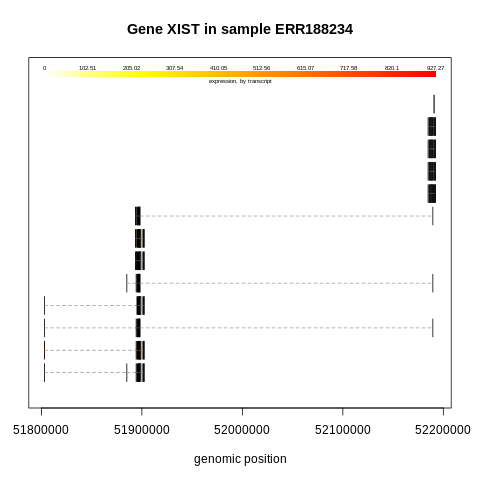

In [ ]:
%%R

plotTranscripts(ballgown::geneIDs(bg_chrX)[1657], bg_chrX, main=c('Gene XIST in sample ERR188234'), sample=c('ERR188234'))

## 05. Reference

- https://rpubs.com/selveyad/hisat2_tutorial
- https://rpubs.com/selveyad/stringtie_tutorial
- https://rpubs.com/selveyad/ballgown_tutorial